## Importo Datos

In [1]:
## Importo Librerías
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bank-full.csv',sep=";")

In [3]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [4]:
df_0 = df

In [5]:
columnas = ['age', 'job', 'marital', 'education', 'balance', 'housing','contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y']

In [6]:
df = df[columnas]

In [7]:
df_0.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [8]:
df.head(2)

,age,job,marital,education,balance,housing,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,2143,yes,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,29,yes,unknown,5,may,151,1,-1,0,unknown,no


In [9]:
## Check nulos
df.isnull().sum()

age          0
job          0
marital      0
education    0
balance      0
housing      0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### Question 1

In [10]:
df.groupby('education').size()

education
primary       6851
secondary    23202
tertiary     13301
unknown       1857
dtype: int64

Rta 1: es secondary el valor más repetido

### Question 2

In [11]:
df.dtypes

age           int64
job          object
marital      object
education    object
balance       int64
housing      object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [12]:
numerical  = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [13]:
df.groupby('y').size()

y
no     39922
yes     5289
dtype: int64

In [14]:
df['y'] = df['y'].str.replace('yes','1')

/tmp/ipykernel_1838/1858719958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].str.replace('yes','1')


In [15]:
df['y'] = df['y'].str.replace('no','0')

/tmp/ipykernel_1838/2907775762.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].str.replace('no','0')


In [16]:
df['y'] = df['y'].astype(int)

/tmp/ipykernel_1838/3666938844.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['y'].astype(int)


In [17]:
import seaborn as sns ## para graficos de estadistica

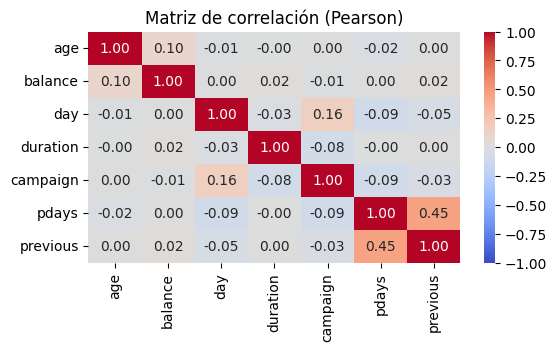

In [18]:
## Matriz de correlación

# Selecciono solo columnas numéricas y elijo método
corr = df[numerical].corr(method="pearson")

# grafico
plt.figure(figsize=(6, 3))
sns.heatmap(
    corr,
    annot=True,          # escribe el número dentro de cada celda
    fmt=".2f",           # 2 decimales
    cmap="coolwarm",     # azul-negativo / rojo-positivo
    vmin=-1, vmax=1      # escala completa
)
plt.title("Matriz de correlación (Pearson)")
plt.show()

In [19]:
df[numerical].corrwith(df.y)

age         0.025155
balance     0.052838
day        -0.028348
duration    0.394521
campaign   -0.073172
pdays       0.103621
previous    0.093236
dtype: float64

Rta 2: las variables que tienen más correlación son pdays and previous

## Question 3

In [20]:
## Divido el dataset 
from sklearn.model_selection import train_test_split

In [21]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

In [22]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [23]:
len(df_train), len(df_test), len(df_val)

(27126, 9043, 9042)

In [24]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [25]:
y_train=df_train.y.values
y_val=df_val.y.values
y_test=df_test.y.values

In [26]:
##del df_train['y']
##del df_val['y']
##del df_test['y']

##### Feature importance: Mutual information

In [27]:
from sklearn.metrics import mutual_info_score

In [28]:
categorical = ['job', 'marital', 'education','housing', 'contact',
       'month', 'poutcome']

In [29]:
for c in categorical:
    coef = mutual_info_score (df_train.y, df_train[c])
    print(c, coef)

job 0.007316082778474635
marital 0.0020495925927810216
education 0.0026967549991295282
housing 0.010343105891750026
contact 0.013356062198247219
month 0.02509003344365025
poutcome 0.029532821290436224


RTA 3:  es poutcome 

## Question 4

In [30]:
del df_train['y']
del df_val['y']
del df_test['y']

In [89]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import accuracy_score

In [81]:
## One Hot Encoding
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

val_dicts = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dicts)

In [82]:
X_train.shape

(27126, 47)

In [83]:
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)

In [84]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'liblinear'
,max_iter,1000
,multi_class,'deprecated'


In [85]:
##y_pred = model.predict_proba(X_val)[:,1]
##y_pred

## no usamos en este caso la probabilidad

array([0.01240549, 0.01017637, 0.15515956, ..., 0.05676404, 0.00908912,
       0.28499536], shape=(9042,))

In [93]:
y_pred = model.predict(X_val)

array([0, 0, 0, ..., 0, 0, 0], shape=(9042,))

In [94]:
original_score = accuracy_score(y_val, y_pred)
original_score
## 0.9009068790090687

## Este valor me da igual que si tomo la probabilidad y el 0.5 como decisión.

0.9009068790090687

RTA 4: accuracy es 0.9

## Question 5

In [54]:
columnas1 = ['job', 'marital', 'education','housing', 'contact',
       'month', 'poutcome','balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
## sin age

In [40]:
columnas2 = ['job', 'marital', 'education','housing', 'contact',
       'month', 'poutcome','age','day', 'duration', 'campaign', 'pdays', 'previous']
## sin balance

In [41]:
columnas3 = ['job', 'education','housing', 'contact',
       'month', 'poutcome','age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
## sin marital

In [42]:
columnas4 = ['job', 'marital', 'education','housing', 'contact',
       'month', 'poutcome','age', 'balance', 'day', 'duration', 'campaign', 'pdays']
## sin previous

In [115]:
## One Hot Encoding
train_dicts = df_train[columnas4].to_dict(orient='records')
dv = DictVectorizer(sparse=False)

dv.fit(train_dicts)
X_train = dv.transform(train_dicts)

val_dicts = df_val[columnas4].to_dict(orient='records')
X_val = dv.transform(val_dicts)

## Modelo
model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

accuracy4 = accuracy_score(y_val, y_pred)

In [110]:
original_score, accuracy1, accuracy2, accuracy3, accuracy4

(0.9009068790090687,
 0.9013492590134926,
 0.9013492590134926,
 0.9009068790090687,
 0.9009068790090687)

In [117]:
accuracy1, accuracy2, accuracy3, accuracy4

(0.9013492590134926,
 0.9010174740101747,
 0.9009068790090687,
 0.9009068790090687)

RTA 5: sin marital y sin previous